In [2]:
import arviz as az
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import graphviz
import os


### Generate Artificial Data

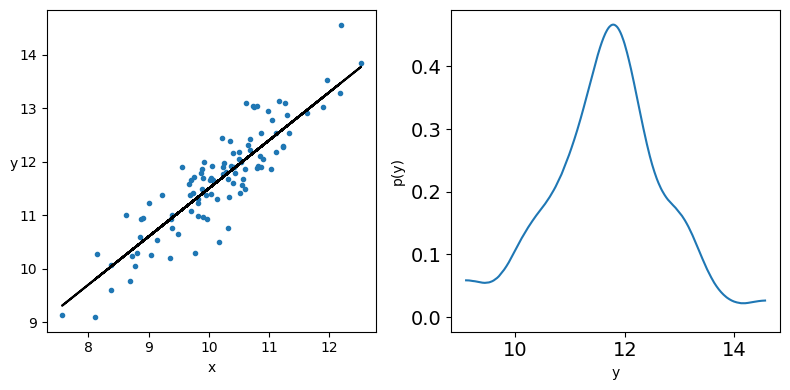

In [3]:
np.random.seed(1)
N = 100

# Parameters
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

# Input data drawn from a Normal distribution
x = np.random.normal(10, 1, N)

# Output generated from the input and the parameters
y_real = alpha_real + beta_real * x

# Add random noise to y
y = y_real + eps_real

# Plot the data
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
ax[1].set_ylabel('p(y)')
plt.tight_layout()


#### Inference of Parameters in Linear Regression

Output()

Output()

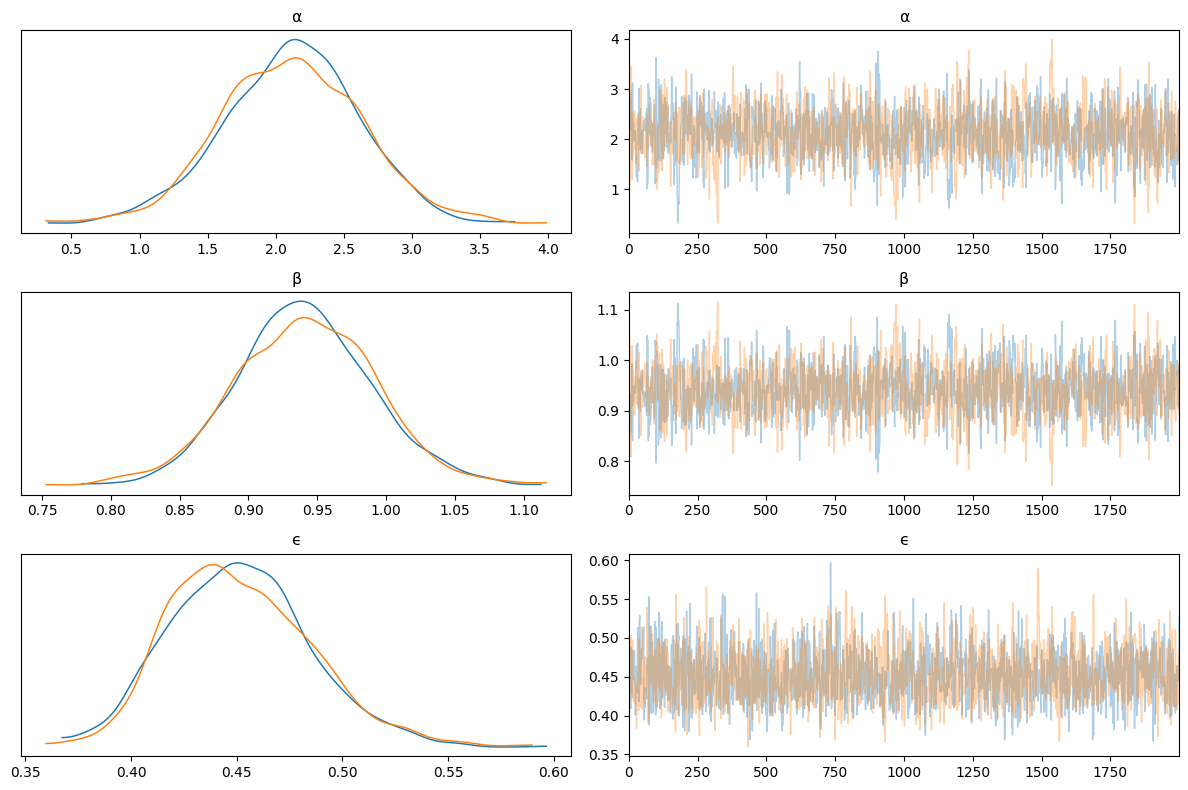

In [4]:
import pymc as pm

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ϵ = pm.HalfCauchy('ϵ', 5) # Try changing this to a half normal, half cauchy has fatter tails
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=y)
    trace_g = pm.sample(2000, tune=1000)


# Basic trace plot with improved spacing
az.plot_trace(
    trace_g, var_names=['α', 'β', 'ϵ'],
    compact=False,  # Adds more space between subplots
    figsize=(12, 8)  # Optional: adjust figure size
)
plt.tight_layout()  # Ensures good spacing
plt.show()

<Axes: xlabel='α', ylabel='β'>

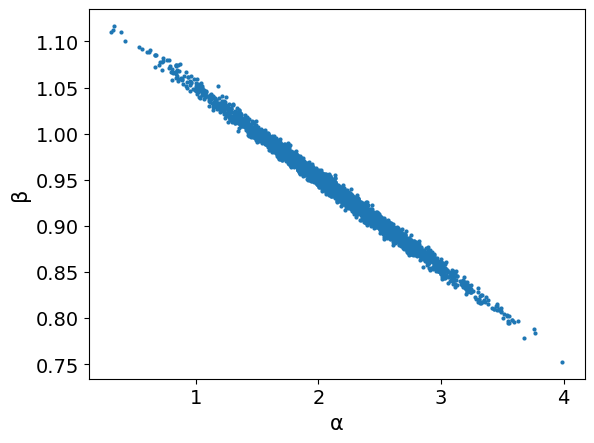

In [5]:
# Pairplot
az.plot_pair(trace_g, var_names=['α', 'β']) # Notice the diagonal shape

## Posterior Sampling

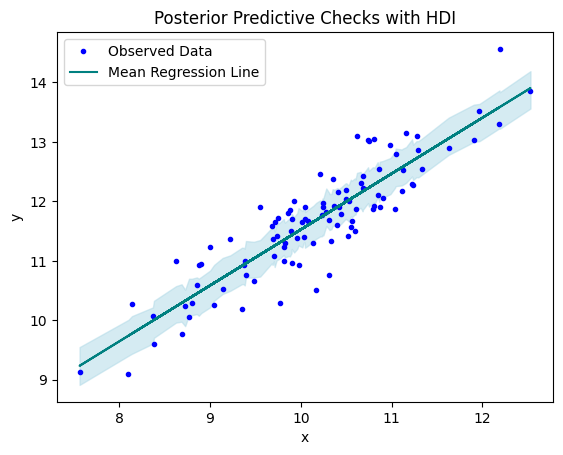

In [9]:
# Plot the posterior predicted samples
az.plot_hdi(x, ppc.posterior_predictive["y_pred"], hdi_prob=0.5, color="lightblue", smooth=False)

# Plot the true y values
plt.plot(x, y, "b.", label="Observed Data")

# Plot the mean regression line
alpha_m = trace_g.posterior['α'].mean().item()  # Mean of alpha posterior
beta_m = trace_g.posterior['β'].mean().item()    # Mean of beta posterior
plt.plot(x, alpha_m + beta_m * x, c="teal", label="Mean Regression Line")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Posterior Predictive Checks with HDI")
plt.show()